# Assignment 3: Word2Vec

In this assignment, we will see how we can use Word2Vec (or any similar word embedding) to use information from unlabelled data to help us classify better!

You will be using the sentiment data from last week, either the yelps or movies, whichever you wish. 

Your goal will be to simulate the following situation: you have a **small** set of labelled data and a large set of unlabelled data. Show how the following 2 techniques compare as the amount of labelled data increases. You should train them on the small labelled subset and test their performance on the rest of the data. 

In other words, train on 1k, test on 99k. Then train on 2k, test on 98k. Then train on 4k, test on 96k. Etc.

1. Logistic regression trained on labelled data, documents represented as term-frequency matrix of your choice. You can learn the vocabulary from the entire dataset or only the labelled data.

2. Logistic regression trained on the labelled data, documents represented as word2vec vectors where you train word2vec using the entire dataset. Play around with different settings of word2vec (training window size, K-negative, skip-gram vs BOW, training windows, etc.). Note: we didn't go over the options in detail in class, so you will need to read about them a bit!

You can read about the gensime word2vec implementation [here](https://radimrehurek.com/gensim/models/word2vec.html).

In [2]:
import re
import spacy
import seaborn as sns
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## Logistic Regression with TF-IDF

We will first illustrate this process with a general example. Next, we will write a function that iterates this function 100 times using different train-test splits. The cross validation score will be plotted on a graph

In [ ]:
## My general approach for both of these problems is to first run the model with a specific train-test split instance 
# (I used 70-30 as an example). Once I have verified that it works/chosen the specific parameters to use, I then 
# run a loop for train-test splits from 0.01-0.99 to 0.99-0.01. Finally, I plot all these results on a graph

In [21]:
# First, we vectorize the Sentiment Data so that documents are represented as term-frequency matrices
movies = pd.read_csv('sentiment/movies.csv')

vectorizer = TfidfVectorizer(min_df=5, 
                             max_df=0.8, 
                             max_features=2000, 
                             use_idf=False, 
                             stop_words='english')

X1 = vectorizer.fit_transform(movies.text)
sentiment1 = movies.positive

In [22]:
# Next, we perform a train-test split. We will use 70-30 for now

X_train, X_test, y_train, y_test = train_test_split(X1, sentiment1, test_size=0.30, random_state=21)

In [23]:
# Now, we fit the LogisticRegression model to the training data

logr = LogisticRegression(solver = 'liblinear', C = 5, max_iter = 1000, penalty = 'l2')

In [24]:
# Finally, we test its accuracy via cross-validation

np.mean(cross_val_score(logr, X_test, y_test, cv=3))


0.8630759678563721

In [25]:
# Now, we begin the loop for different training-test splits

iterate = np.linspace(0, 1, 100,endpoint=False)[1:100,] # array from 0.01 to 0.99
scorestf = []

for i in iterate:
    X_train, X_test, y_train, y_test = train_test_split(X1, sentiment1, test_size=i, random_state=21)
    logr.fit(X_train, y_train)
    one = np.mean(cross_val_score(logr, X_test, y_test, cv=5))
    scorestf.append(one)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-pa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-pa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warni

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warni

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warni

Text(0, 0.5, 'Cross Val Score')

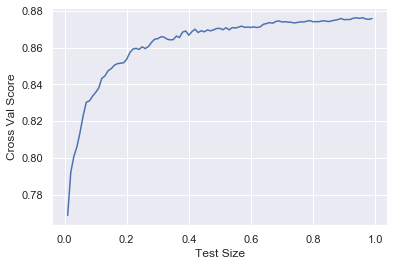

In [27]:
# Finally, we plot the cross-validation scores for all the LogisticRegression() output for splits from 0.01 to 0.99
sns.set()

plt.plot(iterate, scorestf)
plt.xlabel('Test Size')
plt.ylabel('Cross Val Score')


## Logistic Regression with Word2Vec

Logistic regression trained on the labelled data, documents represented as word2vec vectors where you train word2vec using the entire dataset. Play around with different settings of word2vec (training window size, K-negative, skip-gram vs BOW, training windows, etc.). Note: we didn't go over the options in detail in class, so you will need to read about them a bit!

In [85]:
# First, we tokenize the sentences of the reviews

nlp = spacy.load('en_core_web_sm')
not_alphanumeric_or_space = re.compile('[^(\w|\s|\d)]')

def preprocess(doc):
    doc = re.sub(not_alphanumeric_or_space, '', doc)
    words = [t.lemma_.lower() for t in nlp(doc) if t.lemma_ != '-PRON-']
    return words

reviews = movies.text.apply(preprocess)

In [256]:
# Next, we encode the review lables (TRUE or FALSE) as binary 1 or 0
lb = LabelEncoder()
y = lb.fit_transform(sentiment1)

In [254]:
# We train word2vec using the entire dataset

w2v = gensim.models.Word2Vec(reviews, min_count=10, size= 100, workers=3, window =7, sg = 1)
# We are using a skip-gram to predict multiple context words based on an initial word


In [257]:
# Next, we perform a train-test split. Once again, as a trial we use 0.7-0.3

X_train, X_test, y_train, y_test = train_test_split(reviews, y, test_size=0.30, random_state=21)

In [258]:
# Now, we need to create document vectors for each review as inputs for our LogisticRegression classifier
# To do this, we take an average of the word vectors of each review, while removing out-of-vocabulary words 

def document_vector(doc):
    doc = [word for word in doc if word in w2v.wv.vocab]
    return np.mean(w2v[doc], axis=0)

# Creating document vectors for the training and test sets
X_train['doc_vector'] = X_train.apply(document_vector)
X_test['doc_vector'] = X_test.apply(document_vector)
train = list(X_train['doc_vector'])
test = list(X_test['doc_vector'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [269]:
# Now, we fit the LogisticRegression model to the training data

logr = LogisticRegression(solver = 'saga', C = 5, max_iter = 1000, penalty = 'l2')
# The solver is Stochastic Average Gradient descent because the dataset is very large
# The hyperparameter C was chosen after a GridSearchCV 

logr.fit(train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [270]:
# Finally, we test its accuracy via cross-validation

np.mean(cross_val_score(logr, test, y_test, cv=3))


0.53

In [206]:
# Now, we perform a loop of train-test splits from 1-99 to 99-1

iterate = np.linspace(0, 1, 100,endpoint=False)[1:100,] # array from 0.01 to 0.99
scoresvec = []
logr = LogisticRegression(solver = 'saga', C = 5, max_iter = 1000, penalty = 'l2')

for i in iterate:
    X_train, X_test, y_train, y_test = train_test_split(sample, y, test_size=i, random_state=21)
    
    X_train['doc_vector'] = X_train.apply(document_vector)
    X_test['doc_vector'] = X_test.apply(document_vector)
    train = list(X_train['doc_vector'])
    test = list(X_test['doc_vector'])
    
    logr.fit(train, y_train)
    one = np.mean(cross_val_score(logr, test, y_test, cv=5))
    scoresvec.append(one)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() ins

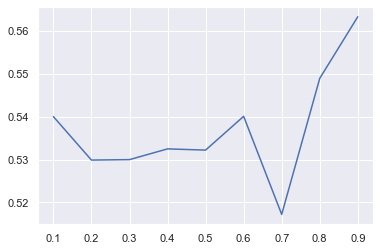

In [207]:
# These scores are plotted
sns.set()

plt.plot(iterate, scoresvec)
plt.xlabel('Test Size')
plt.ylabel('Cross Val Score')


No handles with labels found to put in legend.


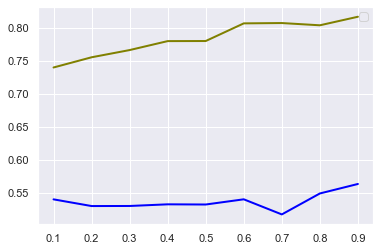

In [251]:
# Finally, we can compare the two methods and the cross-val scores they produce on the same graph

plt.plot(iterate, scorestf, color='olive', linewidth=2, label = "TF-IDF")
plt.plot(iterate, scoresvec, color='blue', linewidth=2, label = "Word2Vec")
plt.xlabel('Test Size')
plt.ylabel('Cross Val Score')
plt.legend(loc="upper right")
